# Homework 1 Assignment


The places where you have enter code are marked with `# YOUR CODE HERE`.

## Question 1 (8 points)

Complete the function `OR3` that implements the 3-qubit to 1-qubit $OR$ operator. This operator acts on 4 qubits in the state $|q_0,q_1,q_2,q_3\rangle$ and maps it to $|q_0,q_1,q_2,q_3 \oplus (q_0 \text{ or } q_1 \text{ or } q_2)  \rangle$.

The function `OR3` has

- Inputs: None
- Returns: A `QuantumCircuit` object with 4 qubits and 1 classical bit that implements the $OR$ operator as described above.

Don't add any measurements to the returned circuit.

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.circuit.library.standard_gates import XGate

def OR3():
    circuit = QuantumCircuit(4,1)
    # Do not modify anything above this line
    
    # YOUR CODE HERE
    circuit.x([0,1,2])
    circuit.mcx([0,1,2], 3)
    circuit.x([0,1,2,3])
    # Do not modify anything below this line  
    return circuit

In the following cell, there is some code that will help you make sure your solution is correct. You can modify this code as you wish. You may also create more cells and write more code to test your own solution. 

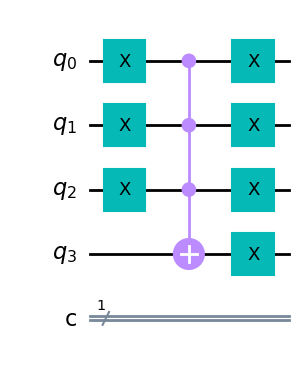

In [6]:
qc = OR3()
qc.draw(output='mpl')

In [7]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

def test(input):
    circuit = QuantumCircuit(4,1)

    for i in range(3):
        if input[i]=='1':
            circuit.x(i)

    # circuit += OR3()
    # You might have noticed that in the latest version of qiskit the += way of 
    # composing circuits is deprecated. So, we use the new way of doing so here
    # Documentation for the compose function is available at
    # https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.compose.html
    circuit.compose(OR3(), range(4), [0], inplace=True)

    circuit.measure(3,0)

    job = execute(circuit,Aer.get_backend('qasm_simulator'),shots=100)
    return job.result().get_counts(circuit)

test('001')

{'1': 100}

# How autograding will work in this workshop
In the next cell, there are some tests (the `assert` statements) that will be used to *grade* if your solution is correct. If executing the next cell results in an error, your implementation is incorrect, and you will not get any marks. 

There are also some hidden tests, not available to you, that will test your solution, once your submit this file back on Canvas. If any of those fail, you will not receive any marks. Otherwise, you will gain full marks on this question.

In [8]:
def Grade_test(input):
    circuit = QuantumCircuit(4,1)

    # implement the input state with a suitable use of X gates.
    for i in range(3):
        if input[i]=='1':
            circuit.x(i)

    # Apply the OR3 gate you created
    circuit.compose(OR3(), range(4), [0], inplace=True)

    # Measure and return the measurement results.
    circuit.measure(3,0)

    job = execute(circuit,Aer.get_backend('qasm_simulator'),shots=100)
    return job.result().get_counts(circuit)


counts = Grade_test('100')
assert counts['1']==100
counts2 = Grade_test('000')
assert counts2['0']==100



In [9]:
# hidden tests in this cell will be used for grading.